### Load Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import tensorflow
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

### Data Load

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/SubhalaxmiRout002/NeuralNetworks/main/diabetes.csv')

The dataset, like many datasets in machine learning, is a comma-separated value (.csv) file. There are 9 columns in this dataset, with data collected for the following characteristics (appearing from left to right in the dataset file):

* Pregnancies : The number of the patient’s previous pregnancies
* Glucose : Plasma glucose concentration
* Blood Pressure : This is the diastolic blood pressure
* Skin Thickness: The skin fold thickness as measured from the triceps area
* Insulin: The blood serum insulin concentration
* BMI: Body mass index
* Diabetes Pedigree Function: This is a summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient’s family record for diabetes
* Age: The patient’s age, in years
* Outcome: This is the desired output we want to be able to predict. A value of 1 indicates the patient developed diabetes within 5 years of the initial measurement; a value of 0 indicates the patient did not develop diabetes.**

### Distribution of variables

Below histogram shows the distribution of the variables. there are 5 patients who had a blood glucose level of 0 which is virtually impossible. The same reasoning applies to the 35 patients with a diastolic blood pressure of 0, and the 11 patients with a BMI of 0.

A final concern about the data is the fact that each of the characteristics has a different scale; i.e., a different range of possible values. This type of situation can cause problems with learning, as variables with larger scales tend to be dominant over variables with smaller scales. To prevent problems with scaling we can normalize the variables to even out the effect each variable has on the learning process.

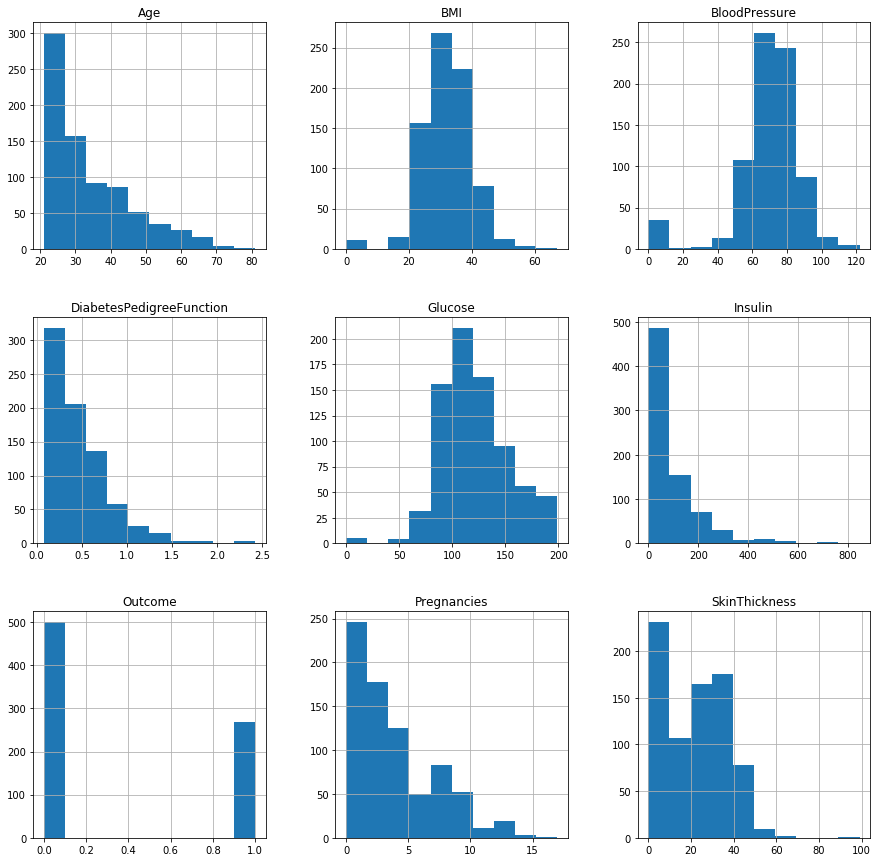

In [6]:
df.hist()
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

### Density Plot

The density plots to determine whether a relationship exists between any of the characteristics and the desired output.

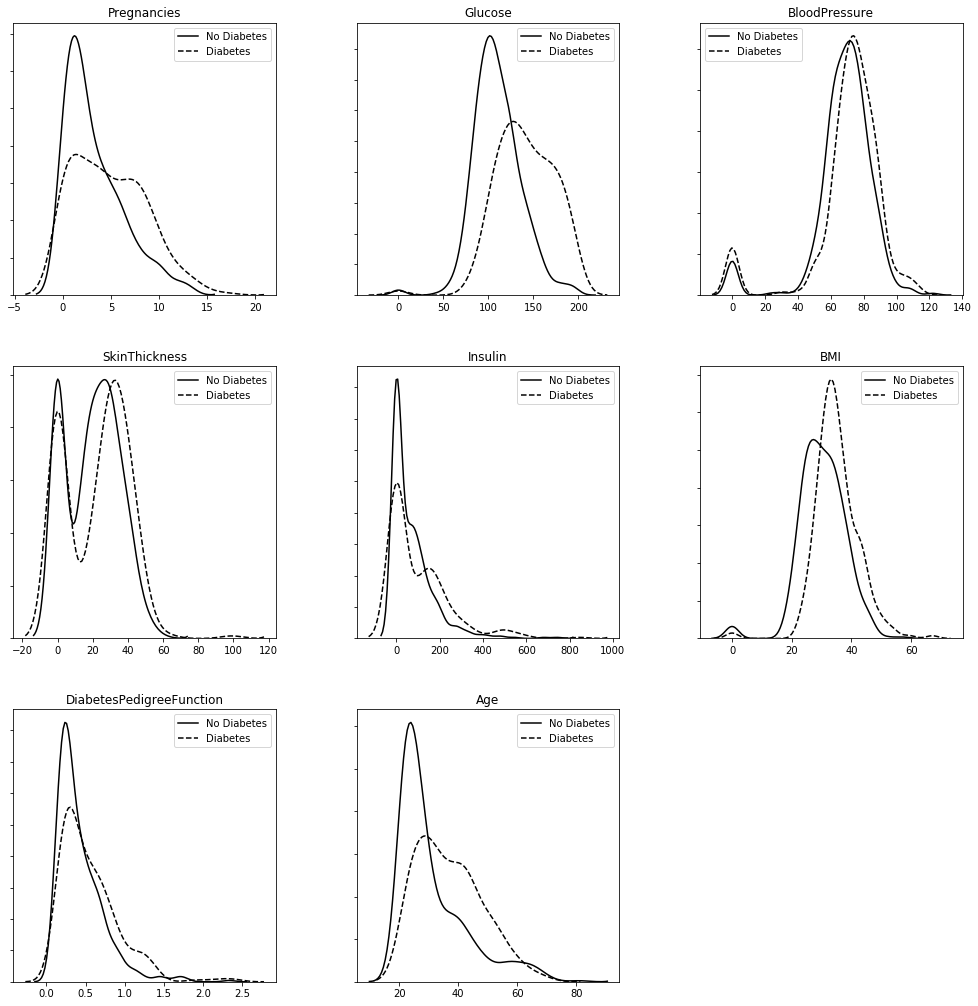

In [8]:
# Create a subplot of 3 x 3
figure, axes = plt.subplots(3,3,figsize=(15,15))
# Make sure there is enough padding to allow titles to be seen
figure.tight_layout(pad=5.0)
# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False,
    axlabel= False, kde_kws={'linestyle':'-',
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False,
    axlabel= False, kde_kws={'linestyle':'--',
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
# Hide the 9th subplot (bottom right) since the relationship between the
# two outcomes themselves is meaningless
plt.subplot(3,3,9).set_visible(False)
# Show the plot
plt.show()

### Exploratory Data Analysis

This section we will check null values, and apply imputaion for zero values.

In [9]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
pd.set_option('max_columns', None)
print(df.describe(include='all'))

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [11]:
print("Number of rows with 0 values for each variable:")
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable:
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [12]:
# Replace 0 with NaN
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [13]:
# Replace all NaN with mean
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

### Data Normalization

To Normalize the data we use method centering which means subtracting the mean value from each column from each value in the column.

In [14]:
# Normalize the data via centering
# Use the scale() function from scikit-learn
print("Centering the data...")
df_scaled = preprocessing.scale(df)
# Result must be converted back to a pandas DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# Do not want the Outcome column to be scaled, so keep the original
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

Centering the data...
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


### Spliting data in to Training Set, Validation Set and Testing Set

Training data : 80% of total data <br>
Validation Set: 20% of Training Set <br>
Testing Set: 20% <br>

In [15]:
# Split dataset into an input matrix (all columns but Outcome) and Outcome vector
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
# Split input matrix to create the training set (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Second split on training set to create the validation set (20% of training set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [16]:
print("Number of observations for Training data = ", X_train.shape[0])
print("Number of observations for Validation data = ", X_val.shape[0])
print("Number of observations for Testing data = ", X_test.shape[0])

Number of observations for Training data =  491
Number of observations for Validation data =  123
Number of observations for Testing data =  154


### Designing the Multilayer Perceptron

Here we use 2 hidden layers and one output layer

In [17]:
model = Sequential()
# hidden layer 1
model.add(Dense(32, activation='relu', input_dim=8))
# hidden layer 2
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the Network

Here we train the network by passing 3 parameters i.e optimizer, loss, and matrices(accuracy).

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the Network

In [19]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5947
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6240 - accuracy: 0.6884
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7291
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.7373
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.7475
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7454
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7475
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7515
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7576
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7617
Epoch 11/

### Testing the Network

We will evaluate the network’s performance using three methods:
    
1. Measuring the testing accuracy
2. Using a confusion matrix
3. Using a Receiver Operating Characteristic (ROC) curve


In [20]:
# Evaluate the accuracy with respect to the training set
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: {:.2f}".format(scores[1]*100))
# Evaluate the accuracy with respect to the testing set
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: {:.2f}".format(scores[1]*100))

16/16 [==============================] - 0s 832us/step - loss: 0.1915 - accuracy: 0.9206
Training Accuracy: 92.06
5/5 [==============================] - 0s 1ms/step - loss: 0.7897 - accuracy: 0.7013
Testing Accuracy: 70.13


### Confusion Matrix

* True positive — the network correctly predicts a patient will likely develop diabetes.
* True negative — the networkcorrectly predicts a patient likely not develop diabetes.
* False positive — the network predicts a patient will likely develop diabetes, when in fact the patient likely will not develop the disease.
* False negative — the network predicts the network predicts a patient will likely not develop diabetes, when in fact the patient likely will develop the disease.

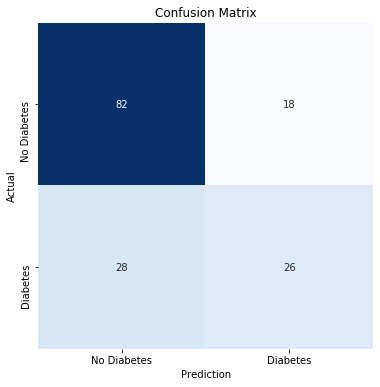

In [21]:
# Construct a confusion matrix
plt.rcParams['figure.figsize'] = [6, 6]
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,
    xticklabels=["No Diabetes","Diabetes"],
    yticklabels=["No Diabetes","Diabetes"],
    cbar=False, cmap="Blues")
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
plt.show()

In [23]:
print("True Negatives : {}".format(c_matrix[0][0]))
print("True Positives : {}".format(c_matrix[1][1]))
print("False Positives : {}".format(c_matrix[0][1]))
print("False Negatives : {}".format(c_matrix[1][0]))

corr_class = round((c_matrix[0][0] + c_matrix[1][1])/154 * 100)
incorr_class = 100 - corr_class

print("Out of 154 observations {}% are truely classified, while {}% were incorrectly classified.".format(corr_class, incorr_class))

True Negatives : 82
True Positives : 26
False Positives : 18
False Negatives : 28
Out of 154 observations 70% are truely classified, while 30% were incorrectly classified.


### ROC Curve

For classification problems involving results where you can have true positives and false positives, it is useful to plot the true positive rate (TPR) against the false positive rate (FPR), creating what is known as a Receiver Operating Characteristic (ROC) curve. The two rates are calculated as follows:
* TPR = True Positives / (True Positives + False Negatives)
* FPR = False Positives / (False Positives + True Negatives)

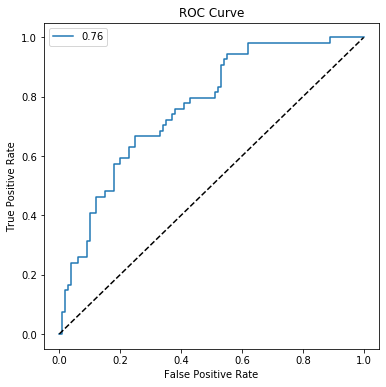

In [22]:
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR, label=round(roc_auc_score(y_test, y_test_pred_probs),2))
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper left")
plt.show()

The larger the area under the curve (AUC), the more accurate the network is. This also means we want the curve to stay as far away from the dashed line as possible. 
The result shown in the graph above represents a performance that is definitely good, but could be a bit better.

### Future Work

The dataset is Imbalanced, data has double non-diabets samples than diabets samples. Imbalanced data also has an impact of accuracy of modeling.

In [78]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

There are different approaches to resolve the Imbalanced data. In the future, if I get time I will work on this.